# 1. Library Imports

In [1]:
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification

from skactiveml.classifier import SklearnClassifier
from skactiveml.utils import unlabeled_indices, labeled_indices, MISSING_LABEL


from ActiveLearner import ActiveLearner # Custom Wrapper Class

import warnings
mlp.rcParams["figure.facecolor"] = "white"
warnings.filterwarnings("ignore")


RANDOM_STATE=42

# 2. Load Dataset

In [2]:
X, y_true = make_classification(n_samples=20_000, n_classes=2, n_features=20, n_redundant=0, random_state=RANDOM_STATE)

In [3]:
X.shape, y_true.shape

((20000, 20), (20000,))

# 3. Model Selection

Models must implement the following functions to be valid :
- predict(X) -> y_pred (absolute values)
- predict_proba(X) -> y_pred (probabilities)
- fit(X, y) -> None
- score(X, y_true) -> accuracy_score

Datatypes :
- X, y, y_pred are all numpy arrays
- accuracy_score is a float

In [4]:
models = {
    'LogisticRegression' : LogisticRegression(random_state=RANDOM_STATE),
    'DecisionTree' : DecisionTreeClassifier(max_depth=6, min_samples_split=2,criterion='gini',random_state=RANDOM_STATE)
    
}

selected_model = models['DecisionTree']
selected_model = SklearnClassifier(selected_model, classes=np.unique(y_true))

# 4. Query Strategy

This object will pick samples from the unlabeled set to give to the oracle to mark at each step.
Note that these are all child classes of the skactiveml.base.QueryStrategy class.
The details and full list of strategies can be found in the [skactiveml documentation](https://scikit-activeml.github.io/scikit-activeml-docs/latest/generated/api/skactiveml.base.QueryStrategy.html)

In [5]:
strategies = ['UncertaintySampling', 'GreedySamplingX']

selection_strategy = strategies[0]

# 5. Experiment Parameters



In [13]:
ex_params = {
    'n_cycles' : 200,
    'batch_size' : 100,
    'USE_TQDM' : True,
    'PRINT_LOGS' : False,
    'log_every' : 10, # only used if PRINT_LOGS is true
    }

# 6. Skactiveml Wrapper Class

In [14]:
learner = ActiveLearner(X, y_true, selected_model, selection_strategy, random_state=RANDOM_STATE)

In [15]:
ex_results = learner.run_experiment(ex_params)

100%|█████████████████████████████████████████████████████████████████████████████████| 200/200 [00:31<00:00,  6.30it/s]


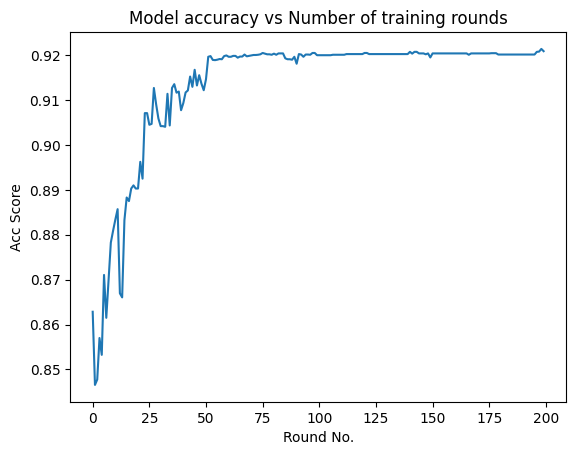

In [16]:
plt.plot(range(ex_results['number_of_iterations']), ex_results['acc_scores'])

plt.title('Model accuracy vs Number of training rounds')
plt.xlabel('Round No.')
plt.ylabel('Acc Score')
plt.show()

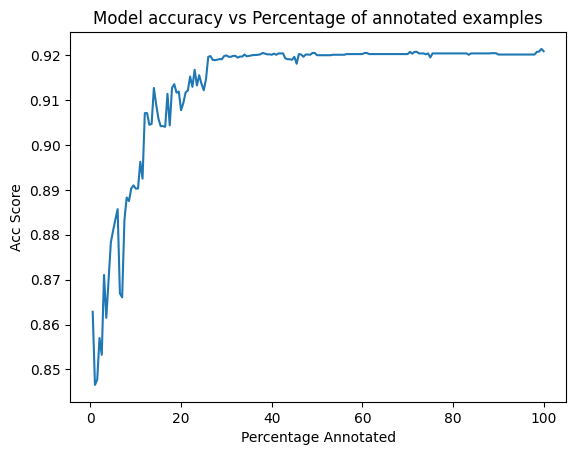

In [17]:
plt.plot(ex_results['percentage_labeled'], ex_results['acc_scores'])

plt.title('Model accuracy vs Percentage of annotated examples')
plt.xlabel('Percentage Annotated')
plt.ylabel('Acc Score')
plt.show()

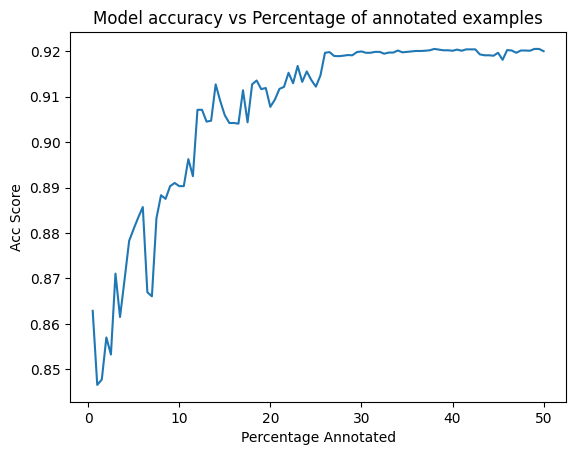

In [20]:
display_upto = 100
plt.plot(ex_results['percentage_labeled'][:display_upto], ex_results['acc_scores'][:display_upto])

plt.title('Model accuracy vs Percentage of annotated examples')
plt.xlabel('Percentage Annotated')
plt.ylabel('Acc Score')
plt.show()